Extreme Learning Machine Applied to the Prediction and modelling of Steels using Big Data

# **Getting Access to your Google Drive**

In [11]:
from google.colab import files
# To allow access to read google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Converting MATLAB File into Numpy Array**
1. Stage: Collection of Data

In [12]:
import scipy.io
input_data = scipy.io.loadmat('/content/drive/MyDrive/Final_Project/Big_Data_Steels/processed_data.mat')
input_data

{'X': array([[1.235e+03, 8.700e+02, 5.850e+02, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.216e+03, 8.680e+02, 5.900e+02, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.205e+03, 8.710e+02, 5.880e+02, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [1.203e+03, 8.510e+02, 5.210e+02, ..., 4.500e-03, 1.480e-03,
         0.000e+00],
        [1.193e+03, 8.380e+02, 5.310e+02, ..., 4.720e-03, 1.550e-03,
         0.000e+00],
        [1.246e+03, 8.100e+02, 5.440e+02, ..., 4.500e-03, 1.480e-03,
         0.000e+00]]), 'Y': array([[400. , 505. ,  35. ],
        [398. , 500. ,  36. ],
        [396. , 497. ,  36.5],
        ...,
        [462. , 571. ,  27.5],
        [464. , 577. ,  29. ],
        [510. , 613. ,  25.5]]), '__globals__': [], '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Nov 28 16:39:41 2018', '__version__': '1.0'}

In [13]:
import numpy as np
import sys

# Converting Input Data
raw_data =  input_data['X']
# Print shape of the input raw data
np.shape(raw_data)
# Converting target vector into numpy target vector (Matrix: 63,162 rows X 3 columns)
target_data =  input_data['Y']
# RENAMING input data 
X = raw_data
Y = target_data
# An alternative to have a look of the shape of the input data
# print(X.shape,np.shape(Y), X.dtype,Y.dtype)

**Selecting only one target, NOTE in order to model the three targets given above you need to run this code three times selcting the corresponding output**

In [14]:
#Selecting only one TARGET at a time
T = Y[:,0]
T.shape

(63162,)

# **INCLUDING THE PACKAGE FOR EXTREME LEARNING MACHINE (NOT AVAILLABLE IN STANDARD LIBRARIES OF PYTHON)**

In [15]:
#  Include this to copy elm into your workspace
!cp /content/drive/MyDrive/Lectures_ML/Week_7/Session_1/elm.py /content

# LIBRARIES for plotting results and normalization of input data and Split of Input Data

In [16]:
import elm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_digits, load_diabetes, make_regression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

#  ---------     Using Normal distribution
# stdsc = StandardScaler()
# xtoy = stdsc.fit_transform(X)

#  ---------     Normalise between [0-1]
scaler = MinMaxScaler()
scaler.fit(X)
xtoy= scaler.transform(X)
# irx
# np.amin(irx)
# np.amax(irx)
# print(T.shape)
x_train, x_test, y_train, y_test = train_test_split(xtoy, T, test_size=0.4)
print(x_train.shape,y_train.shape, x_test.shape,y_test.shape)

(37897, 27) (37897,) (25265, 27) (25265,)


# **Training of PERCEPTRON NEURAL NETWORK (PNN), **
Structure of the PNN and Crossvalidation technique:


1.   Sigmoid for hidden neurons in the hidden layer
2.   Identity function
3.   Hold-out Crossvalidation



In [17]:
# build model and train
model = elm.elm(hidden_units=20, activation_function='sigmoid', random_type='normal', x=x_train, y=y_train, C=5.23, elm_type='reg') 
beta, train_score, running_time = model.fit('solution2')
print("regression beta:\n", beta)
print("regression train score:", train_score)
print("regression running time:", running_time)

regression beta:
 [  -78.2096624   -171.20862593   610.26383239   110.60327842
   542.8240919    260.34668974    10.31943094   427.97555108
  -847.01264062   -84.75573519   -40.75172222  -109.68807045
   853.14419568   877.02271958  1213.47727826  -308.49637923
  -232.05738377 -1451.77982341   399.95701462  -406.34241042]
regression train score: 45.263756627827966
regression running time: 0.1535639999999603


# **Plotting Results of Cross-Validation**

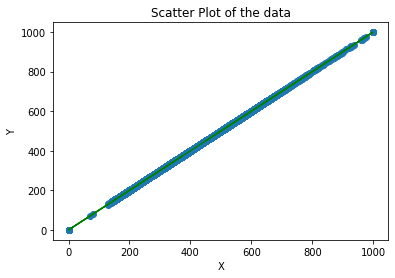

In [18]:
plt.scatter(model.y, y_train)
plt.plot(model.y, model.y,'g-')
plt.title("Scatter Plot of the data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

regression result: [566.31945304 399.90778763 488.16044737 ... 354.63768361 447.79220978
 447.44539463]
regression score: 45.263756627827966
(37897,) (25265,)


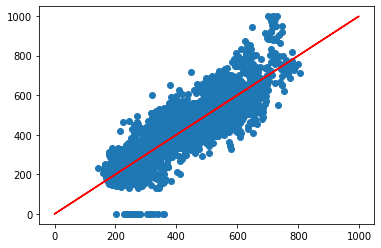

In [19]:
prediction = model.predict(x_test)
# Printing results
print("regression result:", prediction.reshape(-1, ))
print("regression score:", model.score(x_test, y_test))
model.y

plt.scatter(prediction, y_test)
plt.plot(y_test, y_test,'r-')
print(model.y.shape, y_test.shape)

# **PEARSON Correlation Matrix:**


**Pearson correlation** is also known as the Pearson product-moment correlation coefficient and is a normalized measurement of the covariance. It also measures the linear relationship between two variables and fails to capture the non-linear relationship of two variables. Pearson correlation assumes that both variables are normally distributed. It can be used for nominal variables or continuous variables.

Pearson correlation coefficient between two variables X and Y can be calculated by the following formula:

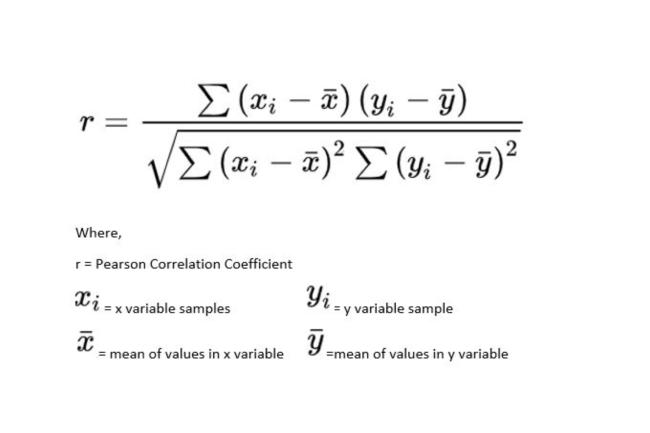



Limitation of Pearson Correlation
It fails to capture the non-linear relationship between two variables.
Usually, we do not use the Pearson correlation coefficient for ordinal variables(where sequence matters).

Types of Correlation:


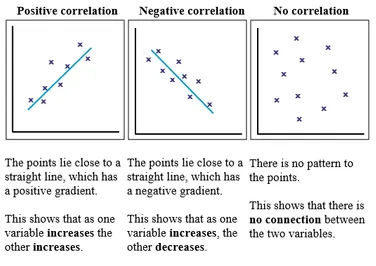

In [ ]:
import seaborn as sns
import pandas as pd
# Basic correlogram
# sns.pairplot(X)
# plt.show()
# numpy_data = np.array([[1, 2], [3, 4]])
df = pd.DataFrame(data=X, columns=["Furnace Temperature", "2","3", "4","5", "6","7", "8","9", "10","11", "12","13", "14","15", "16","17", "18","19", "20","21", "22","23", "24","25", "26","27"])
sns.pairplot(df)
plt.show

Some Useful Links:
Correlogram for Pearson Correlatio:
[link text](https://python-graph-gallery.com/110-basic-correlation-matrix-with-seaborn)